#### sklearn.tree.DecisionTreeClassifier
* class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [12]:
dt_clf = DecisionTreeClassifier(random_state= 156 , max_depth=3)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [13]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
pred = dt_clf.predict(X_test)

In [15]:
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [16]:
from sklearn.metrics import accuracy_score

print(f'정확도는 : {accuracy_score(y_test , pred)}')

정확도는 : 0.9333333333333333


In [17]:
dt_clf.feature_importances_

array([0.        , 0.        , 0.55810743, 0.44189257])

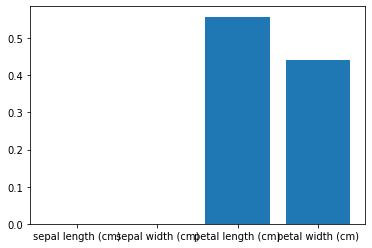

In [18]:
import matplotlib.pyplot as plt 

plt.bar(iris_data.feature_names ,dt_clf.feature_importances_) # transparency
plt.show()

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity = True, filled=True)

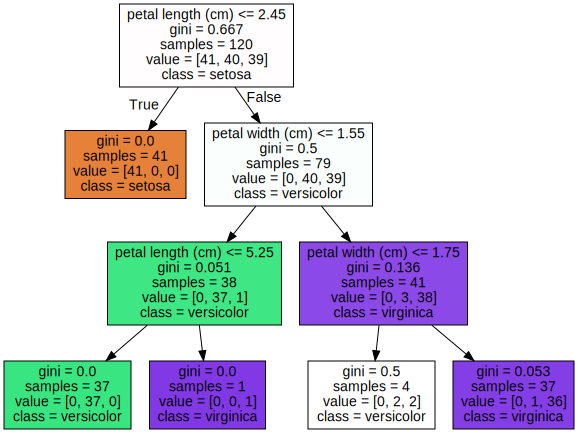

In [20]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

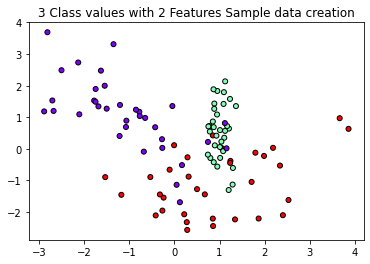

In [21]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시가고하를 위해서 feature 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [25]:
import numpy as np
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),zorder=1)

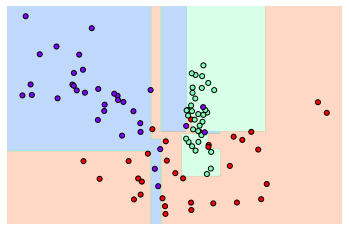

In [26]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

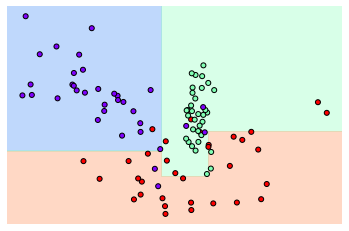

In [27]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화.
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

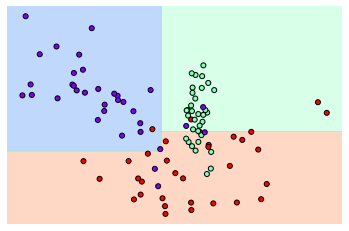

In [30]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화.
dt_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)